<a href="https://colab.research.google.com/github/GuidoJr84/analise-churn-telecomx/blob/main/ChurnTElecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📊 Análise de Churn — TelecomX

Este projeto tem como objetivo analisar dados de clientes de uma empresa de telecomunicações, buscando compreender fatores associados ao cancelamento de serviços (Churn).

A análise foi realizada utilizando a linguagem Python, com foco em manipulação de dados, visualização e extração de insights básicos.


In [7]:
import os

os.listdir('/content')


['.config', 'TelecomX_Data.json', 'sample_data']

In [8]:
import json

caminho_arquivo = '/content/TelecomX_Data.json'

with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
    dados = json.load(arquivo)

type(dados)


list

In [9]:
dados[0]


{'customerID': '0002-ORFBO',
 'Churn': 'No',
 'customer': {'gender': 'Female',
  'SeniorCitizen': 0,
  'Partner': 'Yes',
  'Dependents': 'Yes',
  'tenure': 9},
 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
 'internet': {'InternetService': 'DSL',
  'OnlineSecurity': 'No',
  'OnlineBackup': 'Yes',
  'DeviceProtection': 'No',
  'TechSupport': 'Yes',
  'StreamingTV': 'Yes',
  'StreamingMovies': 'No'},
 'account': {'Contract': 'One year',
  'PaperlessBilling': 'Yes',
  'PaymentMethod': 'Mailed check',
  'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}

In [10]:
import pandas as pd

df = pd.json_normalize(dados)

df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
df.shape


(7267, 21)

In [12]:
df.columns


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [14]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [15]:
df['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [18]:
import numpy as np

df['Churn'] = df['Churn'].replace('', np.nan)



In [19]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
No,5174
Yes,1869
NaN,224


In [22]:
churn_counts = df['Churn'].value_counts()
taxa_churn = churn_counts['Yes'] / churn_counts.sum()

taxa_churn * 100


np.float64(26.536987079369588)

In [23]:
df.groupby('account.Contract')['Churn'].value_counts(normalize=True)


account.Contract  Churn
Month-to-month    No       0.572903
                  Yes      0.427097
One year          No       0.887305
                  Yes      0.112695
Two year          No       0.971681
                  Yes      0.028319
Name: proportion, dtype: float64

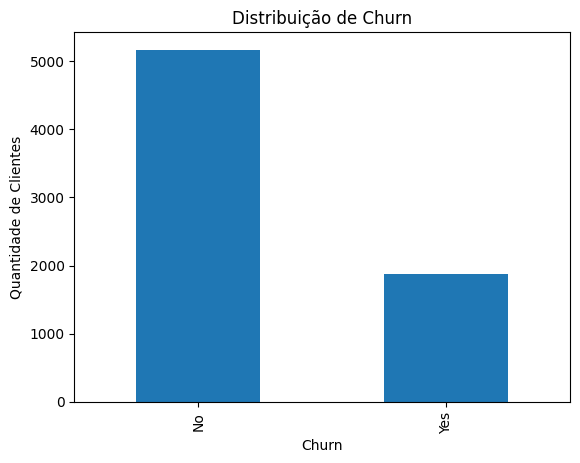

In [24]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()


In [ ]:
# 📊 Análise de Churn — TelecomX

Este gráfico demostra a distribuição dos clientes entre os grupos de churn, grupo NO (não cancelaram) e grupo YES (cancelaram). A taxa de churn é de aproximadamente 26%.


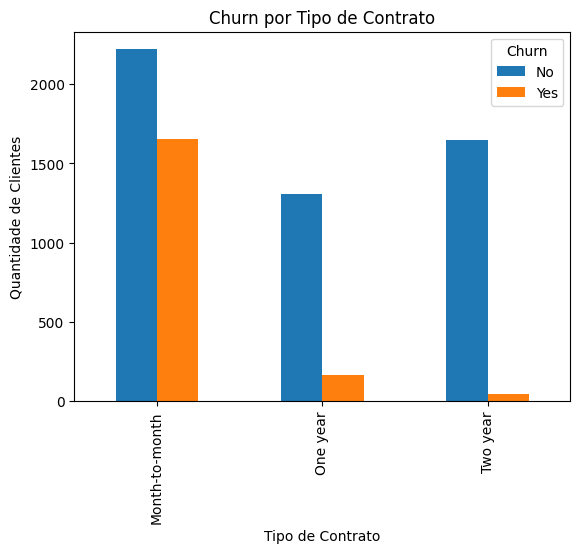

In [25]:
churn_contrato = (
    df[df['Churn'].notna()]
    .groupby(['account.Contract', 'Churn'])
    .size()
    .unstack()
)

churn_contrato.plot(kind='bar')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.show()


In [ ]:
# 📊 Análise de Churn — TelecomX

Neste gráfico observa-se que clientes com contratos mensais apresentam maior taxa de cancelamento, enquanto contratos anuais e bienais mostram maior retenção.



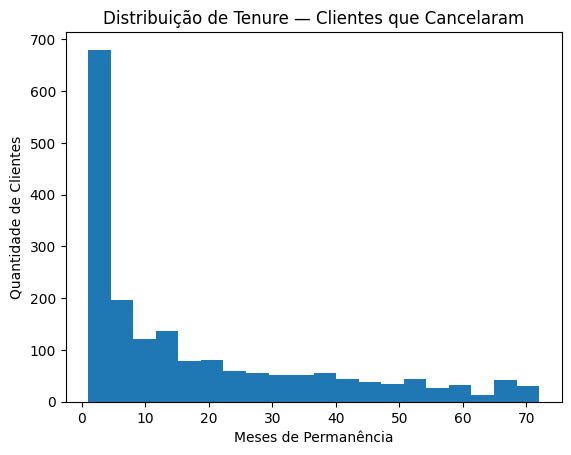

In [26]:
df_tenure = df[df['Churn'].notna()]

plt.hist(df_tenure[df_tenure['Churn'] == 'Yes']['customer.tenure'], bins=20)
plt.title('Distribuição de Tenure — Clientes que Cancelaram')
plt.xlabel('Meses de Permanência')
plt.ylabel('Quantidade de Clientes')
plt.show()


In [ ]:
# 📊 Análise de Churn — TelecomX

Este gráfico expõe que clientes com pouco tempo cancelam mais, e quanto maior o tempo, menor o churn.



In [ ]:
## 🧾 Conclusões

A partir da análise dos dados de clientes da TelecomX, foi possível identificar alguns padrões importantes relacionados ao cancelamento de serviços (Churn).

- A maior parte dos clientes não cancelou o serviço, porém a taxa de churn ainda é significativa.
- Clientes com contratos do tipo *Month-to-month* apresentaram maior propensão ao cancelamento.
- Observou-se que clientes com menor tempo de permanência tendem a cancelar com mais frequência.
- Contratos de maior duração (anuais e bienais) estão associados a uma maior retenção de clientes.

Esses resultados podem auxiliar a empresa na criação de estratégias de retenção, principalmente nos primeiros meses de contrato.
